<a href="https://colab.research.google.com/github/chiungjuyang/colab_example/blob/main/joydivision1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

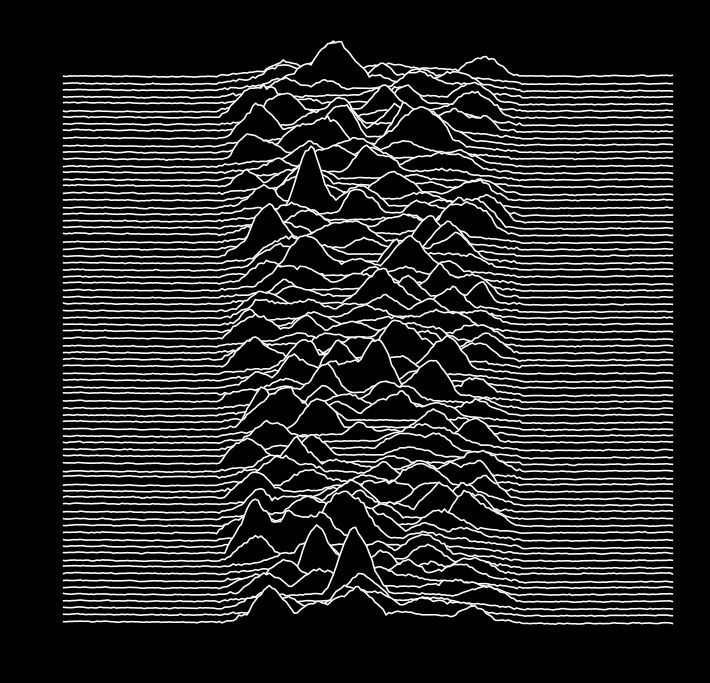

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12, 12), facecolor='black')

# Number of curves to plot
curves_no = 80

# Curve vertical spacing
curve_v_space = 3

# Maximum munber of peaks in the center
max_peaks = 9
# Maximum parabolic peak amplitude
max_parab_peak_amplitude = 0.05
# Maximum pointy peak amplitude
max_point_peak_amplitude = 0.3
#Peak noise
peak_noise = 0.2
# Max peak width
max_peak_width = 12

# Space between the ends and the central wavy part
parab_sides = 55

# Vertical spacing
v_space = 15

# Number of points in time
time_points = 220

# How much to shift the curves up (needed for proper filling the space below curves)
move_up = 500

# Generate X axis numbers
t = np.linspace(-5, 5, time_points)

y_min = move_up
y_max = 0

for i in range(curves_no):

	# Generate oscillations
	y = 0.1*np.sin(15*t + 10) + 0.1*np.sin(2*t + 5) + 0.1*np.sin(t+1)

	# Generate central part
	parab = - 0.6 * t**2
	parab[0:parab_sides] = parab[parab_sides]
	parab[-parab_sides:] = parab[-parab_sides]

	# Generate central noise
	parab_noise = np.sin(np.random.normal(0, 0.1, time_points) * t)
	parab_noise[0:parab_sides] = parab_noise[parab_sides]
	parab_noise[-parab_sides:] = parab_noise[-parab_sides]

	# Generate peaks in the centre
	peak_sum = np.zeros((time_points))
	for j in range(int(np.random.uniform(max_peaks/2, max_peaks, 1))):
		peak_time = int(np.random.uniform(0+parab_sides*1.2, time_points-parab_sides*1.2, 1))

		peak_width = int(np.random.uniform(max_peak_width/2, max_peak_width, 1))

		peak_t = np.linspace(peak_time - peak_width, peak_time+peak_width, peak_width*2)
		peak_parab = np.zeros((time_points))
		# Peak is an upwardly pointing parabola
		#peak_parab[peak_time - peak_width : peak_time+peak_width] = - np.random.uniform(0, max_parab_peak_amplitude, 1) * (peak_t - peak_time)**2 - np.random.uniform(max_point_peak_amplitude/4, max_point_peak_amplitude, 1) * np.abs(peak_t - peak_time)
		peak_parab[peak_time - peak_width : peak_time+peak_width] = - np.random.uniform(0, max_parab_peak_amplitude, 1) * (peak_t - peak_time)**2 - np.random.exponential(max_point_peak_amplitude, 1) * np.abs(peak_t - peak_time)
		#peak_parab[peak_time - peak_width : peak_time+peak_width] = -np.abs(peak_t - peak_time) * 2
		min_peak = min(peak_parab)
		peak_parab[peak_time - peak_width : peak_time+peak_width] -= min_peak

		# Add noise to peak
		peak_parab[peak_time - peak_width : peak_time+peak_width] += np.random.normal(0, peak_noise, peak_width*2)

		peak_sum += peak_parab


	#Make random noise
	s = np.random.normal(0,0.1,time_points)

	y = y + s + parab + parab_noise - i*curve_v_space + peak_sum + move_up

	# Plot the curve in the right order
	plt.plot(t, y, c = 'w', lw = 1.6, zorder = i)

	ax = plt.gca()

	# Fill with black below the curve
	ax.fill_between(t, y, interpolate=True, color='black', zorder = i)

	# Track max and min values
	if min(y) < y_min:
		y_min = min(y)
	if max(y) > y_max:
		y_max = max(y)


# Change background to balck
ax.patch.set_facecolor('black')

#Set plot limits
plt.ylim((y_min - v_space, y_max + v_space))

# Show final plot
plt.show()

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive') # 此處需要登入google帳號
# 獲取授權碼之後輸入即可連動雲端硬碟
data = pd.read_csv("/content/gdrive/My Drive/.ipynb")

Mounted at /content/gdrive
